## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2019:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2019. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [26]:
import pandas as pd
import numpy as np

#### Step 2: Import Financial Package
Import the pandas data reader module as `web`. (Ensure the module is installed with `pip install pandas-datareader` on the command line)

In [27]:
import pandas_datareader as web

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2019 named `start_date` and a datetime object representing July 1st, 2019 named `end_date`.
#### Step 3: Retrieve Data
Call the function `web.get_data_yahoo()` with arguments `symbols`, `start_date` and `end_date` and save the result to `stock_data`.
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [29]:
symbols = ["MSFT", "AMZN", "AAPL", "GOOG", "FB"]
start_date = "2019-01-01"
end_date = "2021-04-20"
stock_data = web.get_data_yahoo(symbols, start_date, end_date)

In [30]:
stock_data

Attributes   Adj Close                                                    \
Symbols           MSFT         AMZN        AAPL         GOOG          FB   
Date                                                                       
2019-01-02   98.375481  1539.130005   38.505024  1045.849976  135.679993   
2019-01-03   94.756454  1500.280029   34.669640  1016.059998  131.740005   
2019-01-04   99.163513  1575.390015   36.149662  1070.709961  137.949997   
2019-01-07   99.289970  1629.510010   36.069202  1068.390015  138.050003   
2019-01-08  100.009888  1656.579956   36.756794  1076.280029  142.529999   
...                ...          ...         ...          ...         ...   
2021-04-14  255.589996  3333.000000  132.029999  2254.840088  302.820007   
2021-04-15  259.500000  3379.090088  134.500000  2296.659912  307.820007   
2021-04-16  260.739990  3399.439941  134.160004  2297.760010  306.179993   
2021-04-19  258.739990  3372.010010  134.839996  2302.399902  302.239990   
2021-04-20  258.260010  3334.689941  133.110001  2293.629883  302.649994   

Attributes       Close                                                    ...  \
Symbols           MSFT         AMZN        AAPL         GOOG          FB  ...   
Date                                                                      ...   
2019-01-02  101.120003  1539.130005   39.480000  1045.849976  135.679993  ...   
2019-01-03   97.400002  1500.280029   35.547501  1016.059998  131.740005  ...   
2019-01-04  101.930000  1575.390015   37.064999  1070.709961  137.949997  ...   
2019-01-07  102.059998  1629.510010   36.982498  1068.390015  138.050003  ...   
2019-01-08  102.800003  1656.579956   37.687500  1076.280029  142.529999  ...   
...                ...          ...         ...          ...         ...  ...   
2021-04-14  255.589996  3333.000000  132.029999  2254.840088  302.820007  ...   
2021-04-15  259.500000  3379.090088  134.500000  2296.659912  307.820007  ...   
2021-04-16  260.739990  3399.439941  134.160004  2297.760010  306.179993  ...   
2021-04-19  258.739990  3372.010010  134.839996  2302.399902  302.239990  ...   
2021-04-20  258.260010  3334.689941  133.110001  2293.629883  302.649994  ...   

Attributes        Open                                                    \
Symbols           MSFT         AMZN        AAPL         GOOG          FB   
Date                                                                       
2019-01-02   99.550003  1465.199951   38.722500  1016.570007  128.990005   
2019-01-03  100.099998  1520.010010   35.994999  1041.000000  134.690002   
2019-01-04   99.720001  1530.000000   36.132500  1032.589966  134.009995   
2019-01-07  101.639999  1602.310059   37.174999  1071.500000  137.559998   
2019-01-08  103.040001  1664.689941   37.389999  1076.109985  139.889999   
...                ...          ...         ...          ...         ...   
2021-04-14  257.480011  3404.040039  134.940002  2275.159912  307.299988   
2021-04-15  257.929993  3371.000000  133.820007  2276.979980  306.339996   
2021-04-16  259.470001  3380.000000  134.300003  2303.000000  308.170013   
2021-04-19  260.190002  3390.330078  133.509995  2291.979980  305.010010   
2021-04-20  257.820007  3373.600098  135.020004  2307.889893  301.989990   

Attributes      Volume                                                 
Symbols           MSFT       AMZN         AAPL       GOOG          FB  
Date                                                                   
2019-01-02  35329300.0  7983100.0  148158800.0  1532600.0  28146200.0  
2019-01-03  42579100.0  6975600.0  365248800.0  1841100.0  22717900.0  
2019-01-04  44060600.0  9182600.0  234428400.0  2093900.0  29002100.0  
2019-01-07  35656100.0  7993200.0  219111200.0  1981900.0  20089300.0  
2019-01-08  31514400.0  8881400.0  164101200.0  1764900.0  26263800.0  
...                ...        ...          ...        ...         ...  
2021-04-14  23070900.0  3145200.0   87222800.0  1011000.0  17421400.0  
2021-04-15  256

In [31]:
stock_data['Adj Close']

Symbols,MSFT,AMZN,AAPL,GOOG,FB
Date,,,,,
2019-01-02,98.375481,1539.130005,38.505024,1045.849976,135.679993
2019-01-03,94.756454,1500.280029,34.669640,1016.059998,131.740005
2019-01-04,99.163513,1575.390015,36.149662,1070.709961,137.949997
2019-01-07,99.289970,1629.510010,36.069202,1068.390015,138.050003
2019-01-08,100.009888,1656.579956,36.756794,1076.280029,142.529999
...,...,...,...,...,...
2021-04-14,255.589996,3333.000000,132.029999,2254.840088,302.820007
2021-04-15,259.500000,3379.090088,134.500000,2296.659912,307.820007
2021-04-16,260.739990,3399.439941,134.160004,2297.760010,306.179993


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

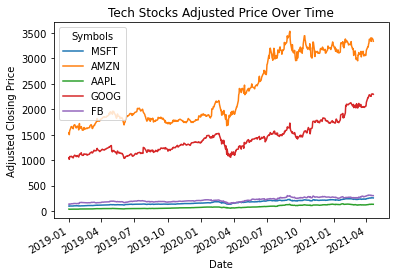

In [32]:
stock_data_closing_prices = stock_data['Adj Close']
stock_data_closing_prices.plot()
plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Tech Stocks Adjusted Price Over Time")
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

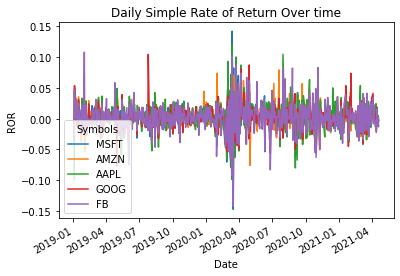

<Figure size 1152x648 with 0 Axes>

In [33]:
stock_data_daily_returns = stock_data['Adj Close'].pct_change()
stock_data_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.figure(figsize=(16,9))
plt.show()

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

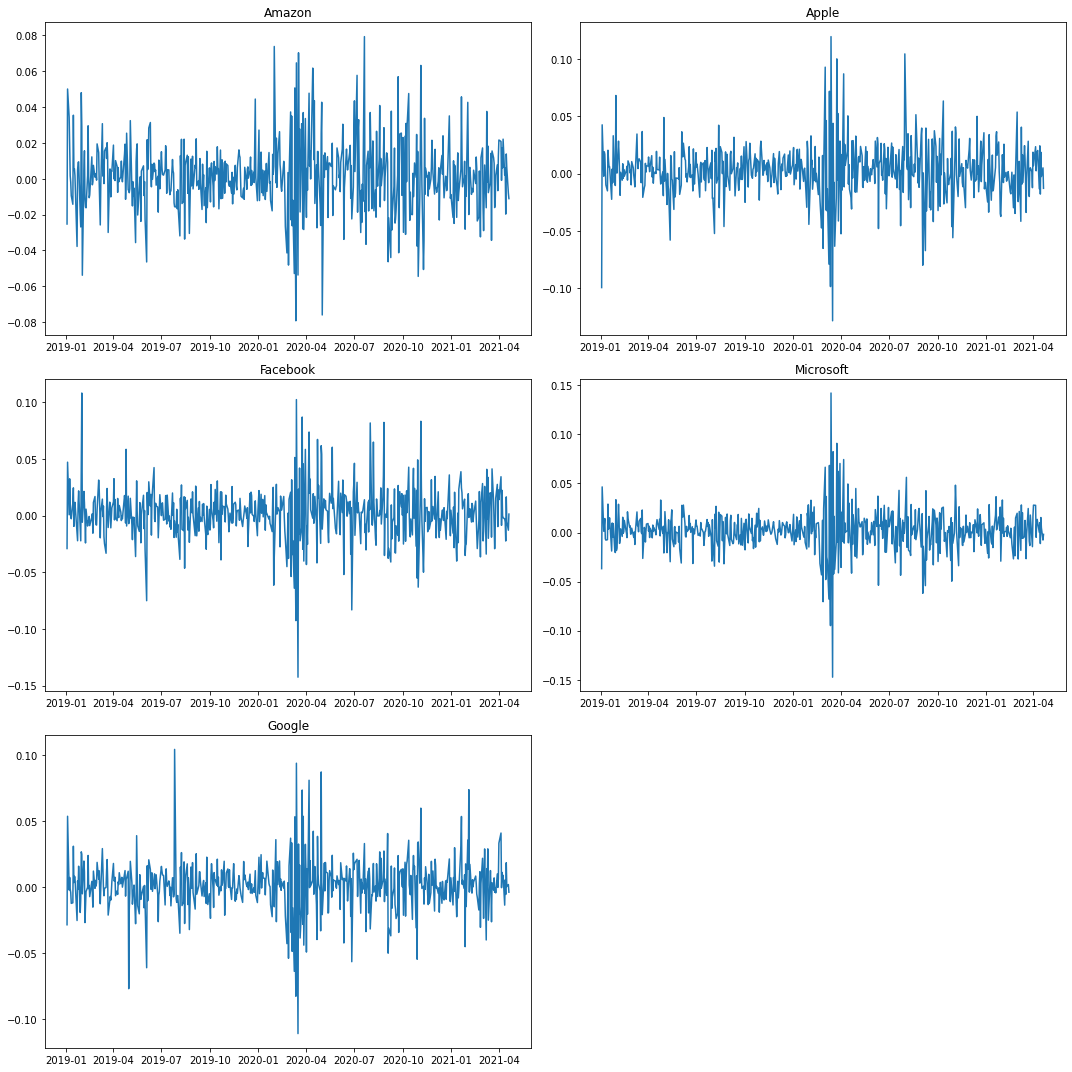

In [34]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.plot(stock_data['Adj Close']['AMZN'].pct_change())
ax1.set_title("Amazon")
ax2.plot(stock_data['Adj Close']['AAPL'].pct_change())
ax2.set_title("Apple")
ax3.plot(stock_data['Adj Close']['FB'].pct_change())
ax3.set_title("Facebook")
ax4.plot(stock_data['Adj Close']['MSFT'].pct_change())
ax4.set_title("Microsoft")
ax5.plot(stock_data['Adj Close']['GOOG'].pct_change())
ax5.set_title("Google")
plt.tight_layout()
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately. 
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

In [35]:
# calculate daily mean
daily_mean = stock_data_daily_returns.mean()

daily_mean

Symbols
MSFT    0.001887
AMZN    0.001528
AAPL    0.002422
GOOG    0.001560
FB      0.001663
dtype: float64

In [36]:
# daily mean index for the x axis
daily_mean.keys()

Index(['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB'], dtype='object', name='Symbols')

In [37]:
# grab each daily mean value for the y axis
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
height

[0.001887195729985756,
 0.0015282385336444265,
 0.0024219002483206113,
 0.0015599774972113155,
 0.0016633242587082695]

In [38]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_mean.keys()))
x_pos

array([0, 1, 2, 3, 4])

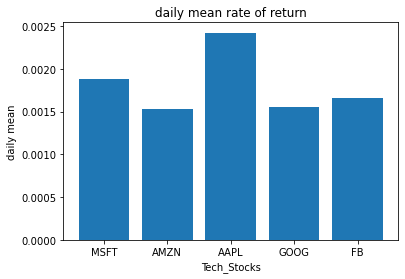

In [39]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_mean.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("daily mean")
plt.title("daily mean rate of return")

# show graphic
plt.show()

Facebook has the highest mean simple rate of return over the period of data collected. Thus Facebook would have been a good choice for investment over this period of time. Google, on the other hand, has the lowest mean simple rate of return over the period.

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately. 
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

In [40]:
# calculate variance
daily_var = stock_data_daily_returns.var()
daily_var

Symbols
MSFT    0.000432
AMZN    0.000381
AAPL    0.000547
GOOG    0.000401
FB      0.000549
dtype: float64

In [41]:
# variance index for the x axis
daily_var.keys()

Index(['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB'], dtype='object', name='Symbols')

In [42]:
# grab each variance value for the y axis
height = []
for key in daily_var.keys():
    height.append(daily_var[key])
height

[0.0004316698305611594,
 0.00038098923914392117,
 0.0005468707522378252,
 0.0004014450568606989,
 0.0005488319329166952]

In [43]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_var.keys()))
x_pos

array([0, 1, 2, 3, 4])

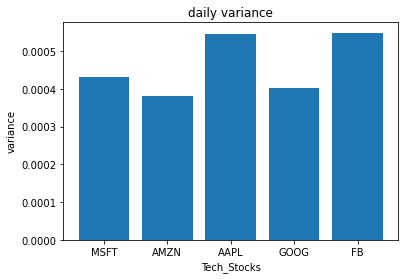

In [44]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_var.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("variance")
plt.title("daily variance")

# show graphic
plt.show()

Facebook shows the highest variance of all the stocks, indicating it can be a riskier investment. Google shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately. 

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

In [45]:
# calculate standard deviation
daily_std = stock_data_daily_returns.std()
daily_std

Symbols
MSFT    0.020777
AMZN    0.019519
AAPL    0.023385
GOOG    0.020036
FB      0.023427
dtype: float64

In [46]:
# standard deviation index for the x axis
daily_var.keys()

Index(['MSFT', 'AMZN', 'AAPL', 'GOOG', 'FB'], dtype='object', name='Symbols')

In [47]:
# grab each standard deviation value for the y axis
height = []
for key in daily_std.keys():
    height.append(daily_std[key])
height

[0.020776665530377086,
 0.019518945646318123,
 0.023385267846185238,
 0.02003609385236301,
 0.023427162289033115]

In [48]:
# arrange keys on x axis based on length
x_pos = np.arange(len(daily_std.keys()))
x_pos

array([0, 1, 2, 3, 4])

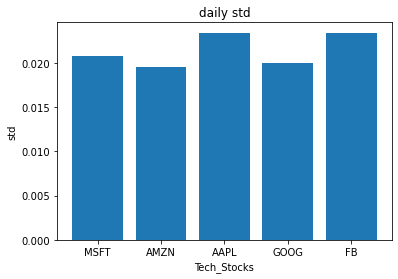

In [49]:
# plot bars
plt.bar(x_pos, height)
 
# create names on the x-axis
plt.xticks(x_pos, daily_std.keys())

# label chart
plt.xlabel("Tech_Stocks")
plt.ylabel("std")
plt.title("daily std")

# show graphic
plt.show()

The answer to this question depends on your investment preferences. Facebook is the most volatile stock, as it has the largest standard deviation. It also, however, has the largest mean return. If you are a more risky investor, this could be your stock of choice. Google, on the other hand, is the least volatile stock, but has the lowest mean return.

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [50]:
stock_data_daily_returns.corr()

Symbols,MSFT,AMZN,AAPL,GOOG,FB
Symbols,,,,,
MSFT,1.000000,0.732927,0.784729,0.785753,0.702120
AMZN,0.732927,1.000000,0.674732,0.654402,0.668787
AAPL,0.784729,0.674732,1.000000,0.679576,0.690725
GOOG,0.785753,0.654402,0.679576,1.000000,0.725025
FB,0.702120,0.668787,0.690725,0.725025,1.000000


None of the stocks are negatively correlated. Microsoft and Google are highly correlated, while Facebook and Apple exhibit the lowest correlation.